(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [6]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Classification

## Measurement

In [ ]:
# accuracy_score, precision_score, recall_score, f1_score, 
# confusion_matrix, classification_report

In [ ]:
from sklearn import metrics

In [ ]:
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction
metrics.classification.confusion_matrix(y_true, y_pred)

In [ ]:
metrics.classification.precision_score(y_true, y_pred, pos_label=0)

In [ ]:
metrics.classification.recall_score(y_true, y_pred, pos_label=1)

In [ ]:
#

In [ ]:
# confusion matrix

In [ ]:
# ROC & AUC 
y_true = [0, 1, 0, 1, 1, 1, 0, 0] # raw data
y_score = [0.2, 0.7, 0.6, 0.6, 0.5, 0.9, 0.4, 0.6] # problistic results
# y_pred = [0, 1, 1, 1, 1, 1, 0, 1] # final prediction

In [ ]:
x, y, thed = metrics.roc_curve(y_true, y_score, pos_label=1)

In [ ]:
%matplotlib inline
plt.plot(x, y)

In [ ]:
# AUC, ROC 

In [ ]:
# AUC  0.9   0.8 which model is better? 

## Basic algorithm

In [2]:
from sklearn import linear_model

In [3]:
linear_model.LogisticRegression?

In [5]:
from sklearn import datasets

/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [6]:
X, Y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2, random_state=3)

In [8]:
import numpy as np

In [41]:
m = 10
X0 = X[Y==0]
X1 = X[Y==1][:m]
print(X0.shape, X1.shape)

Xnew = np.vstack([X0, X1])
Ynew = [0 if i < X0.shape[0] else 1 for i in range(50+m)]

(50, 2) (10, 2)


In [42]:
np.array(Ynew)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

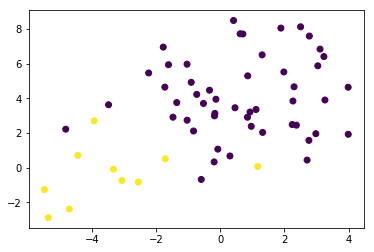

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Xnew[:,0], Xnew[:,1], c=Ynew)

In [23]:
lm_lr = linear_model.LogisticRegression()

In [24]:
lm_lr.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lm_lr.predict(X)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1])

In [26]:
from sklearn import metrics

In [28]:
metrics.classification.confusion_matrix(Y, lm_lr.predict(X))

array([[48,  2],
       [ 3, 47]])

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y)

In [ ]:
a = X[Y==1]

In [ ]:
X, Y = datasets.make_blobs

In [ ]:
from sklearn import tree

In [ ]:
tree.DecisionTreeClassifier(random_state=1)

In [ ]:
# Logistic regression

# decision tree
# http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

# SVM
# https://www.youtube.com/watch?v=3liCbRZPrZA

## Decision boundary

In [44]:
# how to plot a decision boudnary? 

lm_lr = linear_model.LogisticRegression()
lm_lr.fit(Xnew, Ynew)
Ypred = lm_lr.predict(X)

In [35]:
def plot_decision_boundary(lm_lr, Xnew, Ynew):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = Xnew[:, 0].min() - 1, Xnew[:, 0].max() + 1
    y_min, y_max = Xnew[:, 1].min() - 1, Xnew[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    test_x = np.array([x1 for x1 in zip(xx.ravel(), yy.ravel())])
    test_y = lm_lr.predict_proba(test_x)

    plt.contourf(xx, yy, test_y[:,1].reshape(xx.shape), alpha=0.3)
    plt.scatter(Xnew[:,0], Xnew[:,1], c=Ynew)

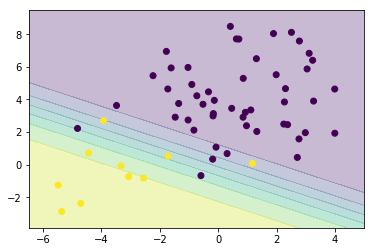

In [45]:
plot_decision_boundary(lm_lr, Xnew, Ynew)

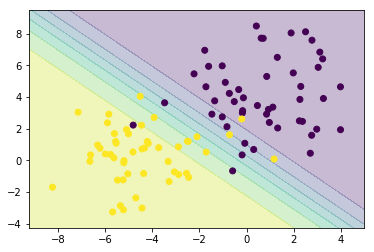

In [36]:
plot_decision_boundary(lm_lr, X, Y)

## Probability calibration

In [ ]:
# What if we want probability to be right? not just prediction result

In [ ]:
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = datasets.make_blobs(n_samples=100, n_features=2, cluster_std=1.0,
                  centers=2, shuffle=False, random_state=42)

In [ ]:
# 0.6 positvie -> 60% 
# logistic regression: 

In [ ]:
# decsion, SVM, NaiveBayes 
model.predict_proba _> 0.70 != 70% 

In [51]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=3)

In [52]:
dtc.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
metrics.classification.confusion_matrix(Y, dtc.predict(X))

array([[49,  1],
       [ 2, 48]])

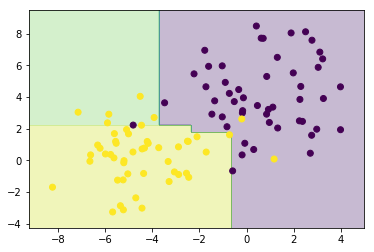

In [54]:
plot_decision_boundary(dtc, X, Y)

In [ ]:
from sklearn import calibration

In [ ]:
ir = calibration.IsotonicRegression?

In [ ]:
from sklearn import pipeline

In [ ]:
pipeline.Pipeline([('lgoistic regression', lm_lr), ('calibration', lr)])

In [ ]:
ir.fit(dtc.predict_proba(X)[:,1], Y)

In [ ]:
ir.predict(dtc.predict_proba(X)[:,1])

# Ensemble Models

## Averaging (bagging & random forest)

In [2]:
# build several estimators independently and then to average their predictions

In [55]:
from sklearn import ensemble

/Users/peter/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [67]:
e_bc = ensemble.BaggingClassifier(n_estimators=101)

In [72]:
e_rfc = ensemble.RandomForestClassifier(n_estimators=101, max_depth=3)

In [73]:
e_bc.fit(X, Y)
e_rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

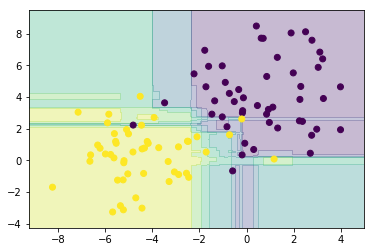

In [70]:
plot_decision_boundary(e_bc, X, Y)

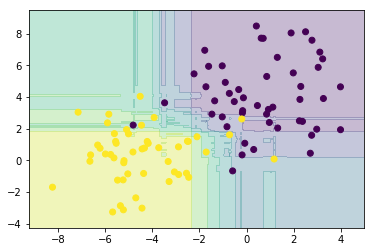

In [74]:
plot_decision_boundary(e_rfc, X, Y)

In [77]:
e_gbc = ensemble.GradientBoostingClassifier()

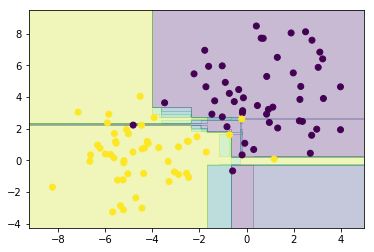

In [78]:
e_gbc.fit(X, Y)
plot_decision_boundary(e_gbc, X, Y)

In [3]:
# randomness in data

In [4]:
# further randomness in model at each level split

In [5]:
# https://www.quora.com/How-does-randomization-in-a-random-forest-work?redirected_qid=212859

## Boosting (adaboost & gradient boosting)

In [ ]:
# adaptive change point weight

In [ ]:
# negative functional gradient